Decision Tree Regression

Importing Libraries

In [29]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datascience as ds
import pandas as pd
plots.style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Read in the Data

In [10]:
us_housing_table = ds.Table.read_table("housing_data_cleaned.csv")
us_housing_table.show(5)

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
376000,3,2,1340,1384,3,0,0,3,1340,0,2008,0
800000,4,3.25,3540,159430,2,0,0,3,3540,0,2007,0
2.23889e+06,5,6.5,7270,130017,2,0,0,3,6420,850,2010,0
324000,3,2.25,998,904,2,0,0,3,798,200,2007,0
549900,5,2.75,3060,7015,1,0,0,5,1600,1460,1979,0


Extract Response and Predictor Arrays

In [9]:
# Response
prices = us_housing_table.column("price")

# Predictors 
bedrooms = us_housing_table.column("bedrooms")
bathrooms = us_housing_table.column("bathrooms")
sqft_living = us_housing_table.column("sqft_living")
sqft_lot = us_housing_table.column("sqft_lot")
floors = us_housing_table.column("floors")
waterfront = us_housing_table.column("waterfront")
view = us_housing_table.column("view")
condition = us_housing_table.column("condition")
sqft_above = us_housing_table.column("sqft_above")
sqft_basement = us_housing_table.column("sqft_basement")
yr_built = us_housing_table.column("yr_built")
yr_renovated = us_housing_table.column("yr_renovated")

Set Seed

In [11]:
seed = 100
np.random.seed(seed)

Split Into Training and Test Data

In [17]:
# 2D Array of Predictors
X = np.column_stack([
    bedrooms, bathrooms, sqft_living, sqft_lot, floors,
    waterfront, view, condition, sqft_above, sqft_basement,
    yr_built, yr_renovated
])

# Response Array
Y = prices

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

Finding the Best Tree Depth

In [26]:
# No Maximum Depth Specified
model = DecisionTreeRegressor(random_state=seed)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Depth: {model.get_depth()}, R²: {r2_score(y_test, y_pred):.4f}, MSE: {mse:.4f}")

# Max Depth 1 - 20
for depth in np.arange(1, 21, 1):
    model = DecisionTreeRegressor(max_depth=depth, random_state=seed)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Depth: {depth}, R²: {r2_score(y_test, y_pred):.4f}, MSE: {mse:.0f}")

Depth: 31, R²: -6.3595, MSE: 956037538514.9497
Depth: 1, R²: 0.2713, MSE: 94658946225
Depth: 2, R²: 0.2352, MSE: 99353817957
Depth: 3, R²: 0.3419, MSE: 85493182119
Depth: 4, R²: 0.1994, MSE: 104005011193
Depth: 5, R²: -1.2044, MSE: 286365237628
Depth: 6, R²: 0.3380, MSE: 85992238517
Depth: 7, R²: 0.3084, MSE: 89841358995
Depth: 8, R²: -6.1339, MSE: 926733042047
Depth: 9, R²: 0.2426, MSE: 98392705443
Depth: 10, R²: 0.1985, MSE: 104124597347
Depth: 11, R²: -6.2696, MSE: 944368845109
Depth: 12, R²: -6.2381, MSE: 940270674301
Depth: 13, R²: 0.1182, MSE: 114554338188
Depth: 14, R²: -6.2752, MSE: 945087800196
Depth: 15, R²: -6.2967, MSE: 947888402745
Depth: 16, R²: -6.2582, MSE: 942878030445
Depth: 17, R²: -6.3324, MSE: 952517718568
Depth: 18, R²: 0.0259, MSE: 126546100546
Depth: 19, R²: 0.0109, MSE: 128484733783
Depth: 20, R²: -6.3081, MSE: 949362322329


Identify Features Based on Their Importance

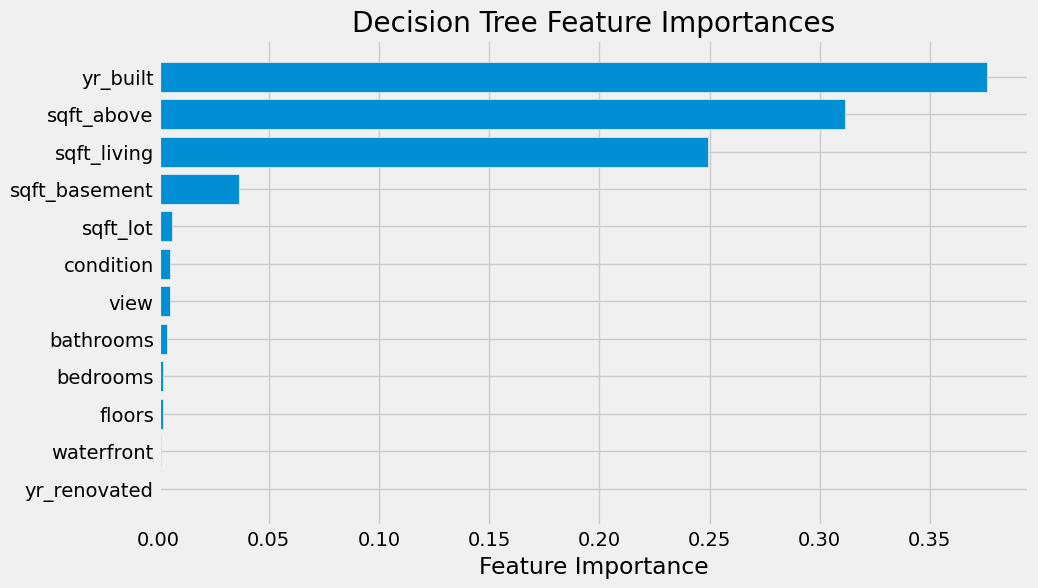

In [30]:
regressor = DecisionTreeRegressor(max_depth=6, random_state=42)
regressor.fit(X_train, y_train)

feature_names = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "waterfront", "view", "condition", "sqft_above", "sqft_basement",
    "yr_built", "yr_renovated"
]
importances = regressor.feature_importances_

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.gca().invert_yaxis()
plt.show()